# ME Assignment
1. Implement the EM algorithm for clustering with multivariate Gaussian models
discussed in the LearningGM section. Initialize the algorithm with the K-means result
(for example Matlab provides a kmeans function). Assume there are only two clusters.
Report the parameters $\pi_k$, $\mu_k$, $\Sigma_k$, $k = 1, 2$ for the following datasets containing
$500-600$ observations from $\mathbb{R}^2$:



#### Import dependencies

In [109]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from os.path import join
from scipy.stats import multivariate_normal

#### Data loading functions

In [110]:
def get_xeasy():
    return load_data("xeasy.txt")

def get_x1():
    return load_data("x1.txt")

def get_x2():
    return load_data("x2.txt")

def load_data(filename):
    path = "data/EM/"
    data = np.loadtxt(join(path,filename), delimiter=',')
    return data


#### EM Algorithm

In [111]:
def EM(data):
    num_clusters = 2   #number of clusters

    #use kmeans to initialize cluster centers
    kmeans = KMeans(n_clusters=num_clusters)
    prediction_labels = np.asarray(kmeans.fit_predict(data))
    cluster_centroids = np.asarray(kmeans.cluster_centers_)
    cluster_variances = np.asarray([np.sum(np.square(data[prediction_labels==k]))/(prediction_labels.size-1)
                         for k in range(num_clusters)])
    mixture_proportions = np.asarray([np.sum(prediction_labels==k)/prediction_labels.size for k in range(num_clusters)])

    pdf = lambda centroid, variance, proportion: multivariate_normal.pdf(data, centroid, variance)*proportion

    converged = False
    counter = 0
    ll_list = []
    while not converged:
        counter += 1
        if counter == 10000:
            print(counter)
            break

        # expectation step
        denominator = np.sum(list(map(pdf, cluster_centroids, cluster_variances, mixture_proportions)),axis=0)
        prediction_labels=[pdf(centroid, variance, proportion)/denominator for centroid, variance, proportion in
                           zip(cluster_centroids, cluster_variances, mixture_proportions)]
        prediction_labels = np.asarray(prediction_labels).T

        # maximization step
        new_cluster_centroids = np.asarray([np.average(data, weights=prediction_labels[:,k], axis=0) for k in range(num_clusters)])
        new_mixture_proportions = np.asarray([np.mean(prediction_labels[:,k]) for k in range(num_clusters)])
        new_cluster_variances = np.asarray([np.average(np.sum(np.square(data), axis=1), weights=prediction_labels[:,k])
                         for k in range(num_clusters)])

        if(np.allclose(new_cluster_centroids, cluster_centroids) and
           np.allclose(new_cluster_variances, cluster_variances) and
           np.allclose(new_mixture_proportions, mixture_proportions)):
            converged = True
            print(counter)
        cluster_centroids = new_cluster_centroids
        cluster_variances = new_cluster_variances
        print(cluster_variances)
        mixture_proportions = new_mixture_proportions
        ll = -np.sum(np.log(np.sum(list(map(pdf, cluster_centroids, cluster_variances, mixture_proportions)),axis=0)))
        ll_list.append(ll)

    plt.plot(ll_list)
    plt.show()
    # Print total log likelihood
    ll = -np.sum(np.log(np.sum(list(map(pdf, cluster_centroids, cluster_variances, mixture_proportions)),axis=0)))
    print(ll)
    test = np.log(np.sum(list(map(pdf, cluster_centroids, cluster_variances, mixture_proportions)),axis=0))
    print(test.shape)

## 1a. xeasy


[11.36054026 11.12771595]
[11.32495912 11.1549841 ]
[11.25328582 11.19865603]
[11.22785468 11.21364035]
[11.22082993 11.21774191]
[11.21915803 11.21871587]
[11.21883633 11.21890318]
[11.21881091 11.21891798]
[11.21883294 11.21890515]
[11.21885278 11.2188936 ]
[11.21886492 11.21888653]
[11.21887156 11.21888267]
[11.21887502 11.21888065]
[11.21887678 11.21887962]
[11.21887768 11.2188791 ]
[11.21887813 11.21887884]
[11.21887835 11.21887871]
[11.21887847 11.21887864]
19
[11.21887852 11.21887861]
2276.333126983517
(500,)


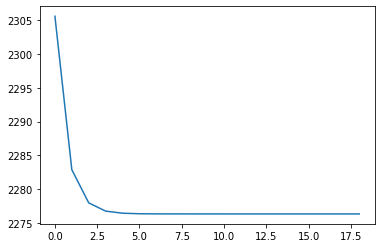

In [112]:
EM(get_xeasy())

[5.82523108 8.57684216]
[6.5261347  8.09592995]
[6.91582608 7.72898748]
[7.10904239 7.50356513]
[7.19935555 7.38603401]
[7.24108437 7.32881469]
[7.26042879 7.30162854]
[7.26944592 7.28880894]
[7.27366723 7.2827749 ]
[7.27564882 7.27993515]
[7.27658047 7.27859842]
[7.27701887 7.27796906]
[7.27722525 7.2776727 ]
[7.27732242 7.27753314]
[7.27736818 7.27746742]
[7.27738973 7.27743647]
17
[7.27739988 7.27742189]
2502.6825055566987
(600,)


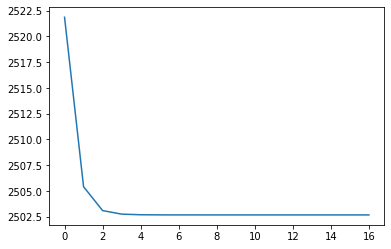

In [113]:
EM(get_x1())

[ 9.88723595 10.50976166]
[ 9.64644305 10.91406496]
[ 9.51942534 11.18499063]
[ 9.42099179 11.45688927]
[ 9.33524518 11.7674901 ]
[ 9.25990159 12.13849417]
[ 9.19751008 12.58801868]
[ 9.15287726 13.13311769]
[ 9.131543   13.78957692]
[ 9.1382941  14.57054007]
[ 9.1756162  15.48498036]
[ 9.24241433 16.53746141]
[ 9.33353869 17.73101883]
[ 9.44051885 19.07458348]
[ 9.55340345 20.59492282]
[ 9.66300068 22.35152843]
[ 9.76258994 24.4527861 ]
[ 9.84854975 27.07294352]
[ 9.92000079 30.46714628]
[ 9.9779556  34.96509438]
[10.02439052 40.8778687 ]
[10.06133073 48.20441953]
[10.08996138 56.19171716]
[10.11044524 63.37749059]
[10.12321438 68.58851075]
[10.13006099 71.72573094]
[10.13332513 73.38529855]
[10.13477233 74.19764451]
[10.13538952 74.57833886]
[10.13564773 74.7524188 ]
[10.13575478 74.83085922]
[10.13579898 74.8658659 ]
[10.13581719 74.8813809 ]
[10.13582469 74.88822014]
[10.13582778 74.8912216 ]
[10.13582905 74.89253381]
[10.13582957 74.8931056 ]
38
[10.13582978 74.89335402]
2791.8961

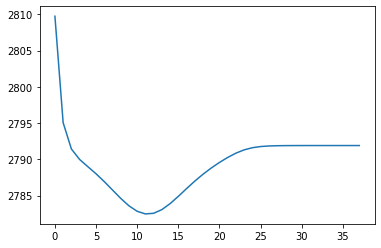

In [114]:
EM(get_x2())
